# Morphological operations

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import cv2 as cv
import pandas as pd

## Monedas gray image

### Open image

In [3]:
monedas_1 = cv.imread("monedas1.png")
monedas_1.shape

(480, 480, 3)

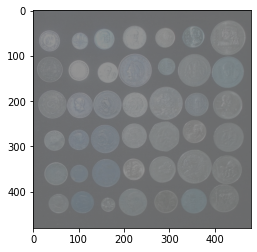

In [4]:
plt.imshow(monedas_1, cmap="gray")
plt.show()

#### Transform image to gray scale

In [5]:
monedas_1_gray = cv.cvtColor(monedas_1, cv.COLOR_BGR2GRAY)
print(monedas_1_gray.shape)

(480, 480)


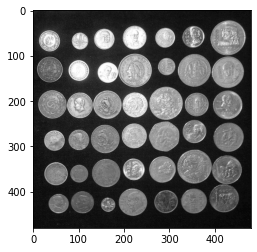

In [6]:
plt.imshow(monedas_1_gray, cmap="gray")
plt.show()

### Binarize image

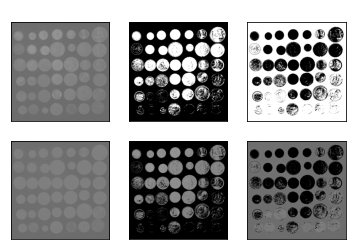

In [7]:
ret,binary = cv.threshold(monedas_1_gray,127,255,cv.THRESH_BINARY)
ret,binary_inv = cv.threshold(monedas_1_gray,127,255,cv.THRESH_BINARY_INV)
ret,trunc = cv.threshold(monedas_1_gray,127,255,cv.THRESH_TRUNC)
ret,tozero = cv.threshold(monedas_1_gray,127,255,cv.THRESH_TOZERO)
ret,tozero_inv = cv.threshold(monedas_1_gray,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [monedas_1_gray, binary, binary_inv, trunc, tozero, tozero_inv]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i], color='w')
    plt.xticks([]),plt.yticks([])
plt.show()

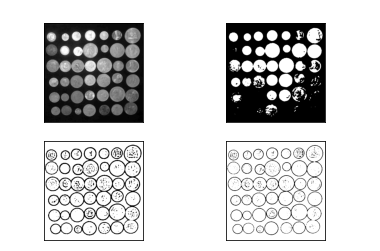

In [8]:
monedas_1_blur = cv.medianBlur(monedas_1_gray, 5)

ret,binary_blur = cv.threshold(monedas_1_blur,127,255,cv.THRESH_BINARY)
adaptative_mean = cv.adaptiveThreshold(monedas_1_blur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
adaptative_gaussian = cv.adaptiveThreshold(monedas_1_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [monedas_1_blur, binary_blur, adaptative_mean, adaptative_gaussian]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], color='w')
    plt.xticks([]),plt.yticks([])
plt.show()

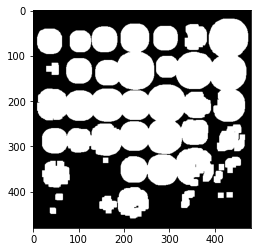

In [9]:
rows,cols = binary_blur.shape

size_ker = 12   # tamaño del kernel cuadrado

d = int(np.floor(size_ker/2)) # longitud de la mitad del kernel, sin contar la columna(rengloon) central.

new = np.zeros((rows,cols), dtype=np.float64)

for j in range(d,rows-d):   
  for k in range(d,cols-d):

    
    win = binary_blur[j-d:j+d, k-d:k+d]
    new[j,k] = np.max(win)   # dilatation
    #new[j,k] = np.min(win)    # erosion

plt.imshow(new, cmap="gray")
plt.show()

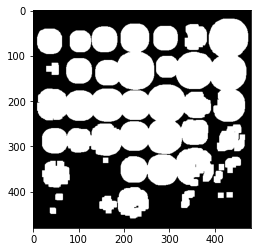

In [10]:
new_bin = np.zeros((rows,cols), dtype=np.float64) * 255

for j in range(d,rows-d):   
  for k in range(d,cols-d):

    if (new[j,k] > 230):
      new_bin[j,k] = 255
    else:
      new_bin[j,k] = 0

plt.imshow(new, cmap="gray")
plt.show()

In [11]:
nn = np.uint8(new_bin)
contours, hierarchy = cv.findContours(nn, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(len(contours))

24


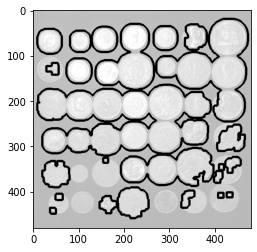

In [12]:
final = cv.drawContours(monedas_1_gray, contours, -1, (0,0,255), 3)
plt.imshow(final, cmap="gray")
plt.show()

## Monedas color

### Open image

In [13]:
monedas_2 = cv.imread('monedas2.png')
monedas_2.shape

(480, 480, 3)

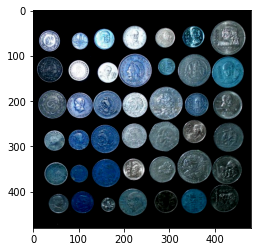

In [14]:
plt.imshow(monedas_2, cmap='gray')
plt.show()

#### Transform to gray scale

In [15]:
monedas_2_gray = cv.cvtColor(monedas_2, cv.COLOR_BGR2GRAY)
print(monedas_2_gray.shape)

(480, 480)


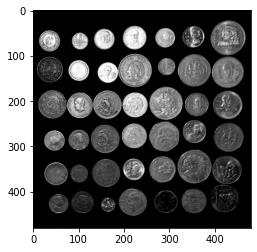

In [16]:
plt.imshow(monedas_2_gray, cmap="gray")
plt.show()

### Binarize image

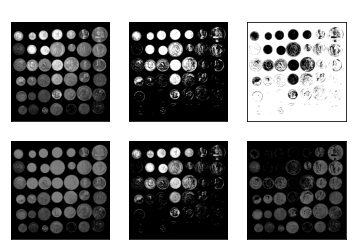

In [17]:
ret,binary = cv.threshold(monedas_2_gray,127,255,cv.THRESH_BINARY)
ret,binary_inv = cv.threshold(monedas_2_gray,127,255,cv.THRESH_BINARY_INV)
ret,trunc = cv.threshold(monedas_2_gray,127,255,cv.THRESH_TRUNC)
ret,tozero = cv.threshold(monedas_2_gray,127,255,cv.THRESH_TOZERO)
ret,tozero_inv = cv.threshold(monedas_2_gray,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [monedas_2_gray, binary, binary_inv, trunc, tozero, tozero_inv]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i], color='w')
    plt.xticks([]),plt.yticks([])
plt.show()

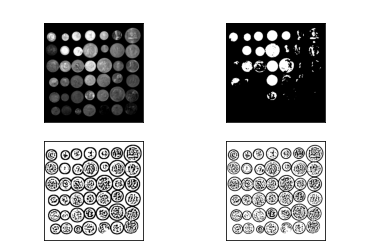

In [18]:
monedas_2_blur = cv.medianBlur(monedas_2_gray, 5)

ret,binary_blur = cv.threshold(monedas_2_blur,127,255,cv.THRESH_BINARY)
adaptative_mean = cv.adaptiveThreshold(monedas_2_blur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
adaptative_gaussian = cv.adaptiveThreshold(monedas_2_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [monedas_2_blur, binary_blur, adaptative_mean, adaptative_gaussian]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], color='w')
    plt.xticks([]),plt.yticks([])
plt.show()

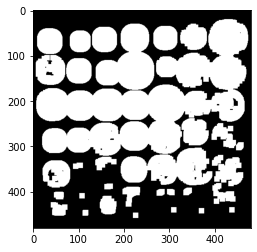

In [20]:
rows,cols = binary.shape

size_ker = 12   # tamaño del kernel cuadrado

d = int(np.floor(size_ker/2)) # longitud de la mitad del kernel, sin contar la columna(rengloon) central.

new = np.zeros((rows,cols), dtype=np.float64)

for j in range(d,rows-d):   
  for k in range(d,cols-d):

    
    win = binary[j-d:j+d, k-d:k+d]
    new[j,k] = np.max(win)   # dilatation
    #new[j,k] = np.min(win)    # erosion

plt.imshow(new, cmap="gray")
plt.show()

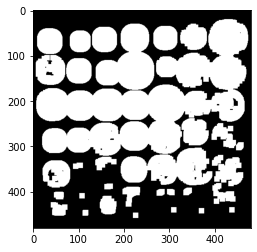

In [21]:
new_bin = np.zeros((rows,cols), dtype=np.float64) * 255

for j in range(d,rows-d):   
  for k in range(d,cols-d):

    if (new[j,k] > 230):
      new_bin[j,k] = 255
    else:
      new_bin[j,k] = 0

plt.imshow(new, cmap="gray")
plt.show()

In [22]:
nn = np.uint8(new_bin)
contours, hierarchy = cv.findContours(nn, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print(len(contours))

32


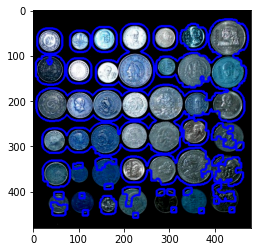

In [28]:
final = cv.drawContours(monedas_2, contours, -1, (0,0,255), 3)
plt.imshow(final, cmap="gray")
plt.show()

## Detect text (Ticket)

In [4]:
ticket = cv.imread('ticket.png')
ticket_gray = cv.cvtColor(ticket,cv.COLOR_BGR2GRAY)

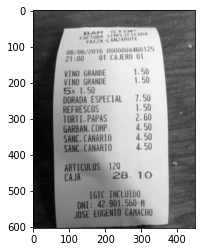

In [5]:
plt.imshow(ticket_gray, cmap="gray")
plt.show()

In [6]:
se=cv.getStructuringElement(cv.MORPH_RECT , (8,8))
bg=cv.morphologyEx(ticket_gray, cv.MORPH_DILATE, se)
out_gray=cv.divide(ticket_gray, bg, scale=255)
out_binary=cv.threshold(out_gray, 0, 255, cv.THRESH_OTSU )[1] 

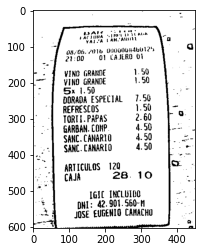

In [7]:
plt.imshow(out_binary, cmap="gray")
plt.show()

In [8]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
morph = cv.morphologyEx(out_binary, cv.MORPH_CLOSE, kernel)

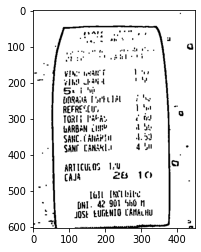

In [9]:
plt.imshow(morph, cmap="gray")
plt.show()

## Detect Text (Hotel)

In [10]:
holiday = cv.imread('holiday.png')
holiday_gray = cv.cvtColor(holiday,cv.COLOR_BGR2GRAY)

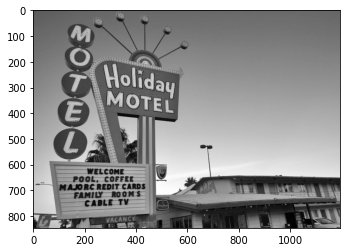

In [11]:
plt.imshow(holiday_gray, cmap="gray")
plt.show()

In [12]:
se=cv.getStructuringElement(cv.MORPH_RECT , (8,8))
bg=cv.morphologyEx(holiday_gray, cv.MORPH_DILATE, se)
out_gray=cv.divide(holiday_gray, bg, scale=255)
out_binary=cv.threshold(out_gray, 0, 255, cv.THRESH_OTSU )[1] 

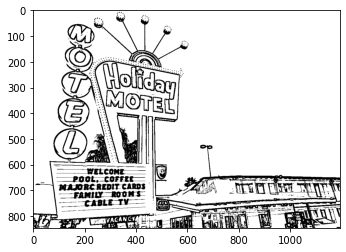

In [13]:
plt.imshow(out_binary, cmap="gray")
plt.show()

In [14]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
morph = cv.morphologyEx(out_binary, cv.MORPH_CLOSE, kernel)

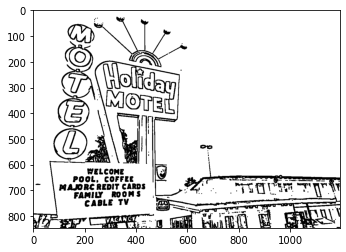

In [15]:
plt.imshow(morph, cmap="gray")
plt.show()